### import libraries

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### read dataset

In [197]:
df = pd.read_csv("Startups.csv")

In [198]:
df.sample(5)


,R&D Spend,Administration,Marketing Spend,State,Profit
38,20229.59,65947.93,185265.10,New York,81229.06
21,78389.47,153773.43,299737.29,New York,111313.02
1,162597.70,151377.59,443898.53,California,191792.06
27,72107.60,127864.55,353183.81,New York,105008.31
33,55493.95,103057.49,214634.81,Florida,96778.92


In [199]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

### split data into dependend and independent

In [200]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [201]:
df=df.replace(to_replace="California" , value=2)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [202]:
df=df.replace(to_replace="New York" , value=1)

In [203]:
df=df.replace(to_replace="Florida" , value=3)

In [204]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


In [205]:
y=df.drop(['R&D Spend', 'Administration', 'Marketing Spend', 'State'] , axis=1)
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [206]:
X=df.drop(["Profit"],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,1
1,162597.70,151377.59,443898.53,2
2,153441.51,101145.55,407934.54,3
3,144372.41,118671.85,383199.62,1
4,142107.34,91391.77,366168.42,3


### create and fit the model

In [207]:
from sklearn.linear_model import LinearRegression
model= LinearRegression().fit(X,y)
model 

LinearRegression()

In [208]:
model.coef_

array([[ 8.06048883e-01, -2.69870879e-02,  2.70265084e-02,
         1.18514656e+02]])

In [209]:
model.intercept_ 

array([49926.22113257])

In [210]:
df=df.dropna()

In [211]:
 model.predict([[165349.20,136897.80,471784.10,1]])

C:\Users\no name\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[192380.47776923]])

### Regression Score 

In [212]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [213]:
reg=LinearRegression().fit(X_test,y_test)


In [214]:
print("test_score = " , reg.score(X_test,y_test) )
print("train_score = " , reg.score(X_train,y_train) )

test_score =  0.9892243313397084
train_score =  0.8067503883870542


In [216]:
model.score(X,y)

0.9507516438334586

### Plotting the Multiple reg model

ValueError: x and y must be the same size

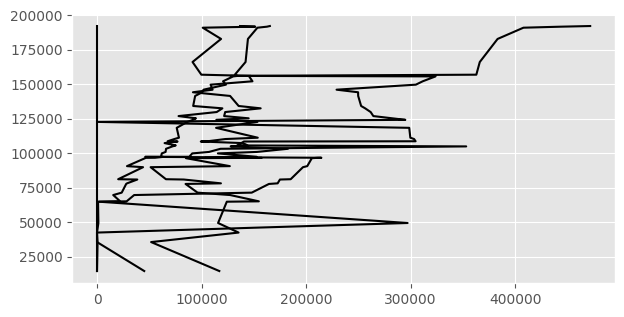

In [215]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(X, y, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()